<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mise-en-bouche" data-toc-modified-id="Mise-en-bouche-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mise en bouche</a></span></li></ul></div>

# Mise en bouche
Pour ce tp, on va effectuer *une descente de gradient sur un polynôme à deux variables*, d'ordre 2 sur les deux variables. Pour les besoins de ce tp on va connaître à l'avance les racines (réélles) de ce polynôme que l'on va générer aléatoirement.

On contraint notre fonction polynomiale à être la somme de deux polynômes indépendants sur chaque variable (pas de termes conjugués), et on se fixe 4 racines $r_1, r_2$ et $r'_1, r'_2$ 
Et on fixe le polynôme :
$$f(x,x') = (x - r_1)(x - r_2) + (x' - r'_1)(x' - r'_2)$$

Pour les besoins du tp, on fixera aléatoirement les racines entre 1 et 10.

## Exercice 1, "fabrication" de la fonction $f(x_1,x_2)$

- *Générer* aléatoirement les racines entières $r_i$ et $r'_i$ avec la fonction [`randint`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html) de `numpy.random`, compris entre 1 et 10 inclus. *Les afficher*.
- Coder la fonction $f(x_1,x_2)$ qui prend en argument deux nombres et renvoie le polynôme décrit ci-dessous. Il est fortement recommandé de s'aider de :
    - [`polyfromroots`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html?highlight=polyfromroots#numpy.polynomial.polynomial.polyfromroots)
    - la fonction `polyfromcoef` ci-jointe, qui prend en argument un array numpy de coefficients polynomiaux et un nombre et  qui renvoie la valeur du polyome en ce nombre.

In [9]:
def polyfromcoef(pol,x):
    xa = x
    acc = pol[0]    
    for i in range(1,pol.shape[0]):
        acc = acc + pol[i] * xa
        xa = x * xa
    return acc

In [10]:
import numpy as np

# générer les racines 
r = np.random.randint(1,11,(2,2))
print(r)

[[2 5]
 [9 6]]


On sait d'avance que le gradient a une valeur en zéro pour 
$$x_1 =  \frac{r_1+r_2}{2}$$
$$x_2 =  \frac{r'_1+r'_2}{2}$$

In [11]:
poly1 = np.polynomial.polynomial.polyfromroots(r[0])
poly2 = np.polynomial.polynomial.polyfromroots(r[1])

In [12]:
def f(x):
    return polyfromcoef(poly1,x[:,0]) + polyfromcoef(poly2,x[:,1])

In [13]:
f(np.array([[2.,3.],[1.,-2.]]))

array([18., 92.])

## Exercice 2, un peu de visualisation

- Trouver des intervalles intéressant de visualisation

In [14]:
# à changer pour %matplotlib inline sur colab
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

def plot_surface_tp(f,X1,X2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ## Bien choisir les intervalles en fonction des racines
    X1, X2 = np.meshgrid(X1, X2)
    XT = np.transpose(np.stack((X1.flatten(),X2.flatten())))
    Y = np.reshape(f(XT),X1.shape)

    # Afficher la surface
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # divers d'affichage
    ax.set_zlim(np.min(Y), np.max(Y))
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # colorbar
    return fig.colorbar(surf, shrink=0.5, aspect=5)

In [15]:
def interesting_range(r,fact):
    aoe = np.max(r)-np.min(r)
    minarg = np.sum(r)/2
    return np.arange(minarg - fact*aoe,minarg+fact*aoe, aoe/20)

<IPython.core.display.Javascript object>


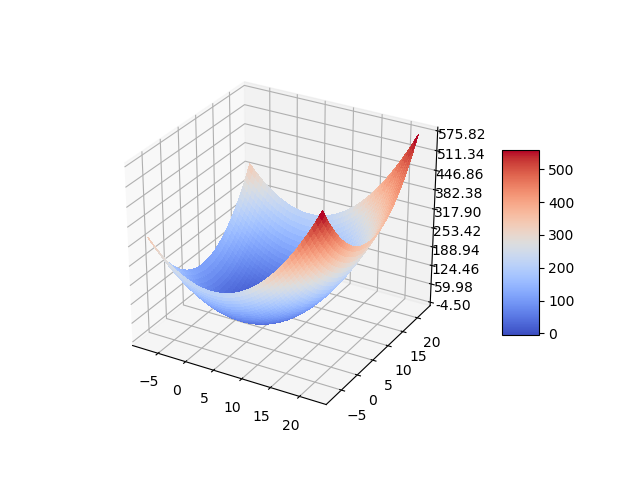

In [16]:
axe1 = interesting_range(r[0],5)
axe2 = interesting_range(r[1],5)

plot_surface_tp(f,axe2,axe2);

## Exercice 3 calcul du gradient

Calculer la valeur du gradient du polynôme en $(1,1)$ $(3,-2)$ et la même chose pour ces points incrémentés de $1$, faire une version avec calcul combiné des points et une version individuelle par points.

In [17]:
import torch 

In [18]:
x0 = torch.tensor([[2.,-1.],[0.5,1.5]],requires_grad=True)
fval = f(x0)
fval.backward(torch.ones_like(fval),retain_graph=True) # On retient le graphe
print("x0 : ", x0)
print("f(x0) : ",fval)
print("gradient de f en x0 : ",x0.grad.data)

x0 :  tensor([[ 2.0000, -1.0000],
        [ 0.5000,  1.5000]], requires_grad=True)
f(x0) :  tensor([70.0000, 40.5000], grad_fn=<AddBackward0>)
gradient de f en x0 :  tensor([[ -3., -17.],
        [ -6., -12.]])


In [19]:
x0.grad.zero_()
x0.data.add_(1.)
fval.backward(torch.ones_like(fval))  # fval n'est pas recalculée!
print("x0 : ", x0)
print("f(x0) : ",fval)
print("gradient de f en x0 : ",x0.grad.data)

x0 :  tensor([[3.0000, 0.0000],
        [1.5000, 2.5000]], requires_grad=True)
f(x0) :  tensor([70.0000, 40.5000], grad_fn=<AddBackward0>)
gradient de f en x0 :  tensor([[ -1., -15.],
        [ -4., -10.]])


In [20]:
x0 = torch.tensor([[3.,0]],requires_grad=True)
fval = f(x0)[0] # fval est correcte
fval.backward()
print("f(x0) : ",fval)
print("x0 : ", x0)
print("gradient de f en x0 : ",x0.grad.data)

f(x0) :  tensor(52., grad_fn=<SelectBackward>)
x0 :  tensor([[3., 0.]], requires_grad=True)
gradient de f en x0 :  tensor([[ -1., -15.]])


In [21]:
x0 = torch.tensor([[1.5,2.5]],requires_grad=True)
fval = f(x0)[0] # fval est correcte
fval.backward()
print("f(x0) : ",fval)
print("x0 : ", x0)
print("gradient de f en x0 : ",x0.grad.data)

f(x0) :  tensor(24.5000, grad_fn=<SelectBackward>)
x0 :  tensor([[1.5000, 2.5000]], requires_grad=True)
gradient de f en x0 :  tensor([[ -4., -10.]])


## Exercice 4 visualisation du gradient

Visualiser la surface correspondant à la norme du gradient.
 - Coder la fonction qui renvoie la norme du gradient en un point, i.e. $||\nabla{f}_{x_1,x_2}(x_1,x_2)||$

In [22]:
def fgrad(x):
    xtorch = torch.tensor(x,requires_grad=True)
    torch.sum(f(xtorch)).backward()
    return torch.norm(xtorch.grad.data,dim=1).numpy()

def fgrad_v(x):
    xtorch = torch.tensor(x,requires_grad=True)
    fval = f(xtorch)
    fval.backward(torch.ones_like(fval))
    return torch.norm(xtorch.grad.data,dim=1).numpy()    

Note : ces deux fonctions sont strictement équivalentes. Cela est dû au fait que le gradient de la somme est égale à la somme des gradients.

In [23]:
print(fgrad([[4.,-2.],[3.,-2]]))
print(fgrad_v([[4.,-2.],[3.,-2]]))

[19.026299 19.026299]
[19.026299 19.026299]


In [42]:
def plot_contour_tp(f,X1,X2,Y=None):
    fig = plt.figure()
    ax = fig.gca()

    ## Bien choisir les intervalles en fonction des racines
    X1, X2 = np.meshgrid(X1, X2)

    if (Y is None):
        XT = np.transpose(np.stack((X1.flatten(),X2.flatten())))
        Y = np.reshape(f(XT),X1.shape)

    # Afficher la surface
    cont = ax.contourf(X1, X2, Y, cmap=cm.coolwarm, antialiased=False,levels=100)

    # colorbar
    fig.colorbar(cont, shrink=0.5, aspect=5)
    return Y

<IPython.core.display.Javascript object>


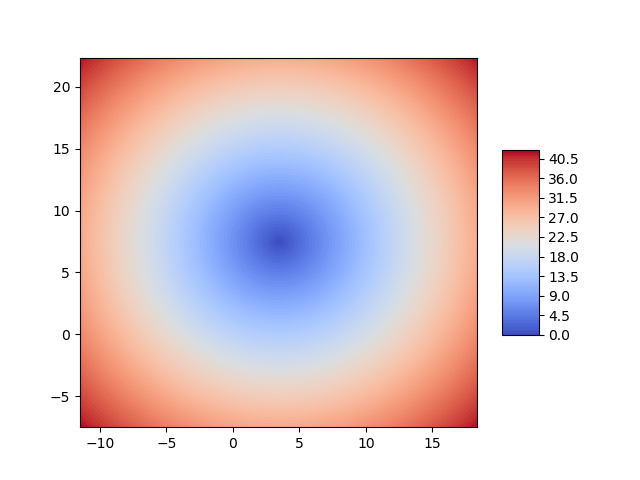

In [43]:
Yp = plot_contour_tp(fgrad,axe1,axe2)

## Descente proprement dite

### Exercice 4

Coder la descente de gradient, jouer avec plusieurs valeurs de $\eta$. Que constatez vous?

In [41]:
def gd(f, x, eta, epsilon,max_iter=50):
    xs = []
    count = 0
    fval = f(x)
    while (count < max_iter):
        count = count + 1
        fval.backward(retain_graph=True)
        if (torch.norm(x.grad) < epsilon):
            break
        else:
            xs.append([x.data[0,0].item(),x.data[0,1].item()])
            x.data.sub_(eta * x.grad.data)
            x.grad.data.zero_()
    print("Itérations : ",count)
    return np.array(xs)

<IPython.core.display.Javascript object>


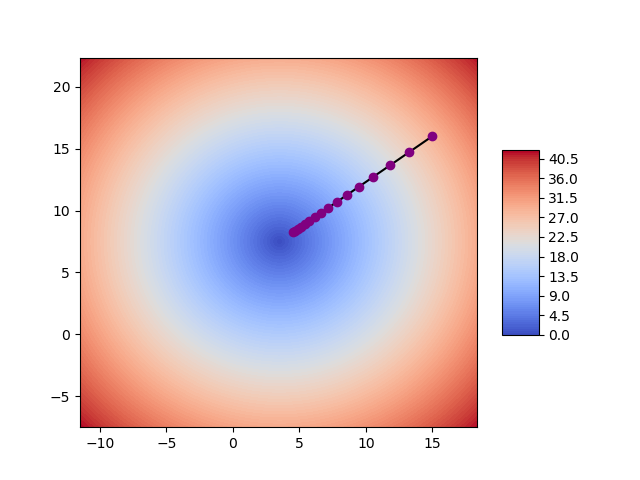

Itérations :  2


interactive(children=(FloatSlider(value=0.1, description='eta', max=0.1, step=0.005), IntSlider(value=50, desc…

In [47]:
plot_contour_tp(fgrad,axe1,axe2,Yp)
toplot = gd(f,x0, 0.1,0.00001)
c1 = plt.plot(toplot[:,0],toplot[:,1],'k')
c2 = plt.plot(toplot[:,0],toplot[:,1], 'o', color='purple')

def plot_gd(eta=0.1, max_iter = 50):  
    global c1, c2
    for handle in c1:
        handle.remove()
    for handle in c2:
        handle.remove()
    x0 = torch.tensor([[15.,16.]],requires_grad=True)
    toplot = gd(f, x0, eta=eta, epsilon=0.00001, max_iter = max_iter)
    c1 = plt.plot(toplot[:,0],toplot[:,1],'k')
    c2 = plt.plot(toplot[:,0],toplot[:,1], 'o', color='purple');
    
from ipywidgets import interact

interact(plot_gd, eta=(0., .1, 0.005), max_iter=(0, 50, 1));

### Exercice 5

On se propose maintenant de perturber "légèrement" les polynômes initiaux en leur ajoutant un facteur $\frac{x^3}{5}$.
Refaire les exercices précédents. Que constatez vous sur la stabilité de la descente de gradient?

In [58]:
def polyfromcoef(pol,x):
    xa = x
    acc = pol[0]    
    for i in range(1,pol.shape[0]):
        acc = acc + pol[i] * xa
        xa = x * xa
    return acc + x * xa * 0.2

In [59]:
def f(x):
    return polyfromcoef(poly1,x[:,0]) + polyfromcoef(poly2,x[:,1])

<IPython.core.display.Javascript object>


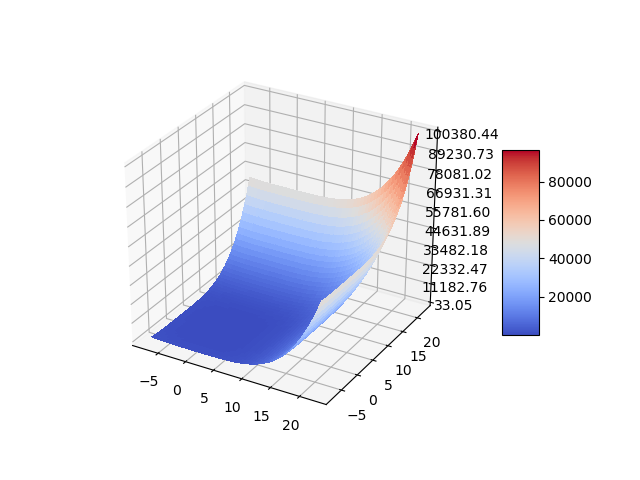

In [64]:
plot_surface_tp(f,axe2,axe2);

<IPython.core.display.Javascript object>


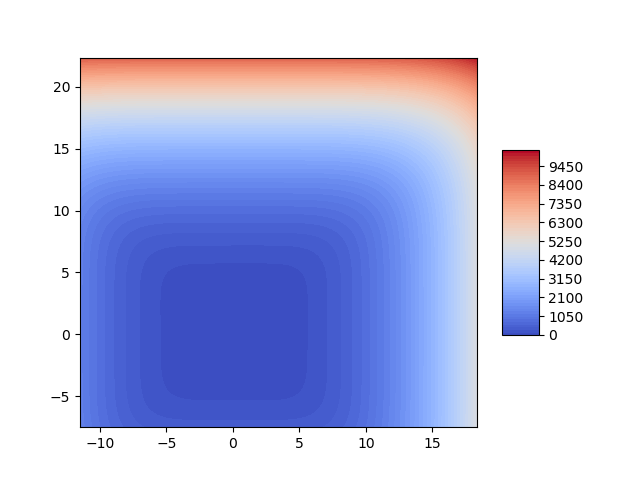

In [66]:
Yp = plot_contour_tp(fgrad,axe1,axe2)

In [67]:
def fgrad(x):
    xtorch = torch.tensor(x,requires_grad=True)
    fval = torch.sum(f(xtorch))
    fval.backward()
    return torch.norm(xtorch.grad.data,dim=1).numpy()

<IPython.core.display.Javascript object>


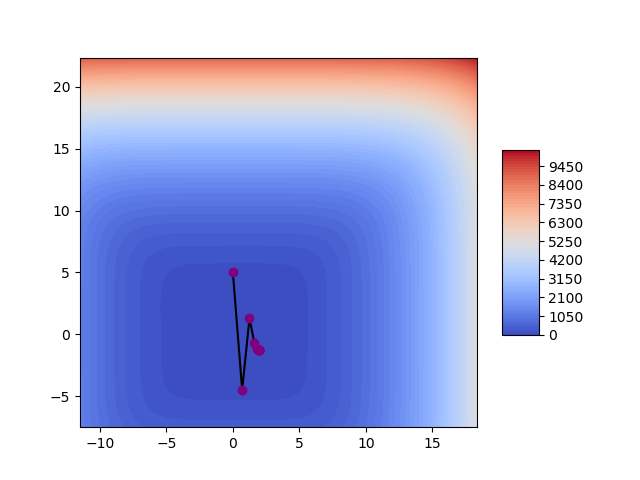

Itérations :  16


interactive(children=(FloatSlider(value=0.1, description='eta', max=0.15, step=0.005), IntSlider(value=50, des…

In [75]:
init = [0.,5.]
x0 = torch.tensor([init],requires_grad=True)
Yp = plot_contour_tp(fgrad,axe1,axe2)
toplot = gd(f,x0, 0.1,0.00001)
c1 = plt.plot(toplot[:,0],toplot[:,1],'k')
c2 = plt.plot(toplot[:,0],toplot[:,1], 'o', color='purple')

def plot_gd(eta=0.1, max_iter = 50):  
    global c1, c2
    for handle in c1:
        handle.remove()
    for handle in c2:
        handle.remove()
    x0 = torch.tensor([init],requires_grad=True)
    toplot = gd(f, x0, eta=eta, epsilon=0.00001, max_iter = max_iter)
    c1 = plt.plot(toplot[:,0],toplot[:,1],'k')
    c2 = plt.plot(toplot[:,0],toplot[:,1], 'o', color='purple');
    
from ipywidgets import interact

interact(plot_gd, eta=(0., .15, 0.005), max_iter=(0, 50, 1));